<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(0)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_0'

In [4]:
os.listdir(base_path)

['data_multi_delta_0_n20.csv',
 'data_multi_delta_0_n30.csv',
 'data_multi_delta_0_n60.csv',
 'data_multi_delta_0_n120.csv',
 'data_multi_delta_0_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,66.221930,87.515742,39.564759,-0.905313,202.397117,203.099400,-0.702283
1,0.0,1.0,27.358579,85.175773,25.158899,1.861829,149.555081,147.763359,1.791721
2,0.0,2.0,48.047951,50.551370,56.589382,-2.596801,162.591901,165.116325,-2.524424
3,0.0,3.0,57.287854,71.672236,57.226650,1.813244,197.999984,196.057154,1.942830
4,0.0,4.0,93.433099,47.042189,20.924177,-1.348533,170.050932,170.959461,-0.908529
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,59.798766,64.267473,71.602501,-1.197450,204.471290,205.901626,-1.430335
59996,999.0,56.0,70.105994,48.595092,49.681872,1.097315,179.480273,178.282514,1.197759
59997,999.0,57.0,92.747353,87.361238,89.036946,0.894263,280.039801,279.938013,0.101788
59998,999.0,58.0,68.164230,82.755943,88.010537,1.407078,250.337788,249.565723,0.772065


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,66.221930,87.515742,39.564759,-0.905313,202.397117,203.099400,-0.702283
1,0.0,1.0,27.358579,85.175773,25.158899,1.861829,149.555081,147.763359,1.791721
2,0.0,2.0,48.047951,50.551370,56.589382,-2.596801,162.591901,165.116325,-2.524424
3,0.0,3.0,57.287854,71.672236,57.226650,1.813244,197.999984,196.057154,1.942830
4,0.0,4.0,93.433099,47.042189,20.924177,-1.348533,170.050932,170.959461,-0.908529
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,59.798766,64.267473,71.602501,-1.197450,204.471290,205.901626,-1.430335
59996,999.0,56.0,70.105994,48.595092,49.681872,1.097315,179.480273,178.282514,1.197759
59997,999.0,57.0,92.747353,87.361238,89.036946,0.894263,280.039801,279.938013,0.101788
59998,999.0,58.0,68.164230,82.755943,88.010537,1.407078,250.337788,249.565723,0.772065


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    66.221930  87.515742  39.564759 -0.905313  202.397117   
      1.0    27.358579  85.175773  25.158899  1.861829  149.555081   
      2.0    48.047951  50.551370  56.589382 -2.596801  162.591901   
      3.0    57.287854  71.672236  57.226650  1.813244  197.999984   
      4.0    93.433099  47.042189  20.924177 -1.348533  170.050932   
...                ...        ...        ...       ...         ...   
999.0 55.0   59.798766  64.267473  71.602501 -1.197450  204.471290   
      56.0   70.105994  48.595092  49.681872  1.097315  179.480273   
      57.0   92.747353  87.361238  89.036946  0.894263  280.039801   
      58.0   68.164230  82.755943  88.010537  1.407078  250.337788   
      59.0   93.912795  57.969956  66.149525  0.691248  228.723524   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    203.099400 -0.702283  
      1.0    147.763359  1.791721  
      2.0    165.116325 -2.524424  
      3.0    196.057154  1.942830  
      4.0    170.959461 -0.908529  
...                 ...       ...  
999.0 55.0   205.901626 -1.430335  
      56.0   178.282514  1.197759  
      57.0   279.938013  0.101788  
      58.0   249.565723  0.772065  
      59.0   228.255948  0.467576  

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    66.221930  87.515742  39.564759 -0.905313  202.397117   
      1.0    27.358579  85.175773  25.158899  1.861829  149.555081   
      2.0    48.047951  50.551370  56.589382 -2.596801  162.591901   
      3.0    57.287854  71.672236  57.226650  1.813244  197.999984   
      4.0    93.433099  47.042189  20.924177 -1.348533  170.050932   
...                ...        ...        ...       ...         ...   
999.0 55.0   59.798766  64.267473  71.602501 -1.197450  204.471290   
      56.0   70.105994  48.595092  49.681872  1.097315  179.480273   
      57.0   92.747353  87.361238  89.036946  0.894263  280.039801   
      58.0   68.164230  82.755943  88.010537  1.407078  250.337788   
      59.0   93.912795  57.969956  66.149525  0.691248  228.723524   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    203.099400 -0.702283  
      1.0    147.763359  1.791721  
      2.0    165.116325 -2.524424  
      3.0    196.057154  1.942830  
      4.0    170.959461 -0.908529  
...                 ...       ...  
999.0 55.0   205.901626 -1.430335  
      56.0   178.282514  1.197759  
      57.0   279.938013  0.101788  
      58.0   249.565723  0.772065  
      59.0   228.255948  0.467576  

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,66.221930,87.515742,39.564759,-0.905313,202.397117,203.099400,-0.702283
1,0.0,1.0,27.358579,85.175773,25.158899,1.861829,149.555081,147.763359,1.791721
2,0.0,2.0,48.047951,50.551370,56.589382,-2.596801,162.591901,165.116325,-2.524424
3,0.0,3.0,57.287854,71.672236,57.226650,1.813244,197.999984,196.057154,1.942830
4,0.0,4.0,93.433099,47.042189,20.924177,-1.348533,170.050932,170.959461,-0.908529
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,59.798766,64.267473,71.602501,-1.197450,204.471290,205.901626,-1.430335
59996,999.0,56.0,70.105994,48.595092,49.681872,1.097315,179.480273,178.282514,1.197759
59997,999.0,57.0,92.747353,87.361238,89.036946,0.894263,280.039801,279.938013,0.101788
59998,999.0,58.0,68.164230,82.755943,88.010537,1.407078,250.337788,249.565723,0.772065


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    66.221930  87.515742  39.564759 -0.905313  202.397117   
      1.0    27.358579  85.175773  25.158899  1.861829  149.555081   
      2.0    48.047951  50.551370  56.589382 -2.596801  162.591901   
      3.0    57.287854  71.672236  57.226650  1.813244  197.999984   
      4.0    93.433099  47.042189  20.924177 -1.348533  170.050932   
...                ...        ...        ...       ...         ...   
999.0 55.0   59.798766  64.267473  71.602501 -1.197450  204.471290   
      56.0   70.105994  48.595092  49.681872  1.097315  179.480273   
      57.0   92.747353  87.361238  89.036946  0.894263  280.039801   
      58.0   68.164230  82.755943  88.010537  1.407078  250.337788   
      59.0   93.912795  57.969956  66.149525  0.691248  228.723524   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    203.099400 -0.702283  
      1.0    147.763359  1.791721  
      2.0    165.116325 -2.524424  
      3.0    196.057154  1.942830  
      4.0    170.959461 -0.908529  
...                 ...       ...  
999.0 55.0   205.901626 -1.430335  
      56.0   178.282514  1.197759  
      57.0   279.938013  0.101788  
      58.0   249.565723  0.772065  
      59.0   228.255948  0.467576  

[60000 rows x 7 columns]

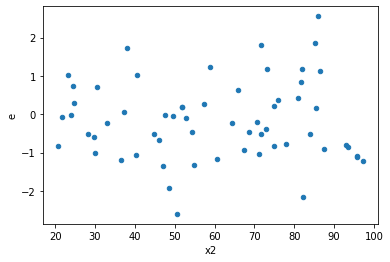

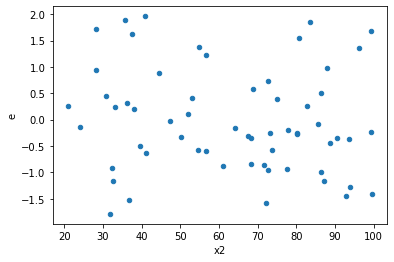

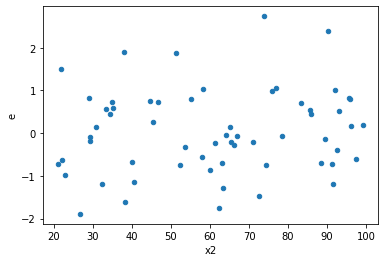

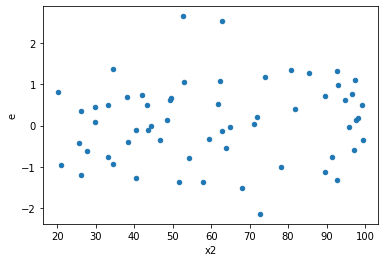

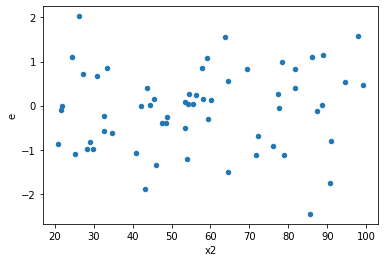

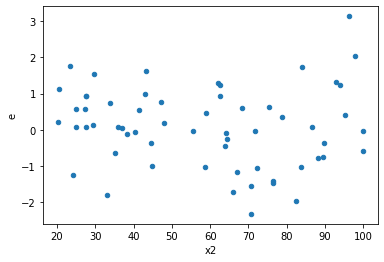

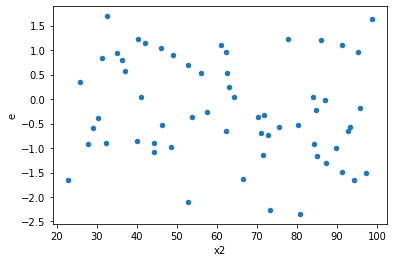

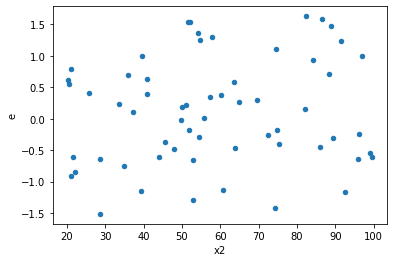

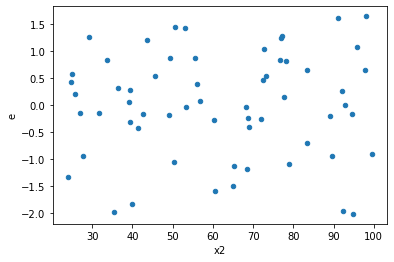

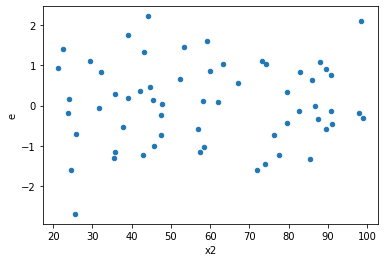

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,21.0,21.0,19.480427995654512,26.535312388696486,0.9276394283645006,1.2635863042236422,1.3621524329247643,0.4849184510599063,0.7575407744700469,0.24245922552995314,Reject001=1 : Homoscedasticity
1.0,21.0,21.0,15.614411612680676,28.519456696953565,0.7435434101276512,1.3580693665215984,1.8264829571799253,0.17575460397882736,0.9121226980105863,0.08787730198941368,Reject001=1 : Homoscedasticity
2.0,21.0,21.0,18.16289428432307,20.74185149281188,0.8648997278249081,0.9877072139434228,1.1419904321479635,0.7637860777942309,0.6181069611028845,0.38189303889711546,Reject001=1 : Homoscedasticity
3.0,21.0,21.0,17.243838950968364,18.10790425109645,0.8211351881413507,0.8622811548141167,1.0501086389512797,0.9118553221381804,0.5440723389309098,0.4559276610690902,Reject001=1 : Homoscedasticity
4.0,21.0,21.0,14.896927993992945,19.905489464628673,0.7093775235234736,0.9478804506966034,1.3362143841102934,0.5123888103705574,0.7438055948147213,0.2561944051852787,Reject001=1 : Homoscedasticity
5.0,21.0,21.0,9.081613275477705,33.40400808946938,0.4324577750227479,1.5906670518794943,3.678201997399221,0.00430681300835456,0.9978465934958227,0.00215340650417728,Reject001=0 : Heteroscedasticity
6.0,21.0,21.0,16.053197933328548,21.73218467771851,0.7644379968251689,1.0348659370342148,1.353760463676813,0.4936584687083716,0.7531707656458142,0.2468292343541858,Reject001=1 : Homoscedasticity
7.0,21.0,21.0,12.525741816793328,15.06692802944974,0.5964638960377775,0.7174727633071305,1.2028771029951641,0.6759922729467869,0.6620038635266066,0.33799613647339344,Reject001=1 : Homoscedasticity
8.0,21.0,21.0,17.775892884398935,22.3411939140533,0.8464710897332827,1.063866376859681,1.2568254128973242,0.6051475450614667,0.6974262274692666,0.30257377253073336,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,19.480427995654512,26.535312388696486,0.9276394283645006,1.2635863042236422,1.3621524329247643,0.4849184510599063,Reject001=1 : Homoscedasticity
1.0,21.0,21.0,15.614411612680676,28.519456696953565,0.7435434101276512,1.3580693665215984,1.8264829571799253,0.17575460397882736,Reject001=1 : Homoscedasticity
2.0,21.0,21.0,18.16289428432307,20.74185149281188,0.8648997278249081,0.9877072139434228,1.1419904321479635,0.7637860777942309,Reject001=1 : Homoscedasticity
3.0,21.0,21.0,17.243838950968364,18.10790425109645,0.8211351881413507,0.8622811548141167,1.0501086389512797,0.9118553221381804,Reject001=1 : Homoscedasticity
4.0,21.0,21.0,14.896927993992945,19.905489464628673,0.7093775235234736,0.9478804506966034,1.3362143841102934,0.5123888103705574,Reject001=1 : Homoscedasticity
5.0,21.0,21.0,9.081613275477705,33.40400808946938,0.4324577750227479,1.5906670518794943,3.678201997399221,0.00430681300835456,Reject001=0 : Heteroscedasticity
6.0,21.0,21.0,16.053197933328548,21.73218467771851,0.7644379968251689,1.0348659370342148,1.353760463676813,0.4936584687083716,Reject001=1 : Homoscedasticity
7.0,21.0,21.0,12.525741816793328,15.06692802944974,0.5964638960377775,0.7174727633071305,1.2028771029951641,0.6759922729467869,Reject001=1 : Homoscedasticity
8.0,21.0,21.0,17.775892884398935,22.3411939140533,0.8464710897332827,1.063866376859681,1.2568254128973242,0.6051475450614667,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      983
Reject001=0 : Heteroscedasticity     17
Name: Result_test, dtype: int64